# Reference
1. [Prophet model](https://facebook.github.io/prophet/).
2. [SP 500 data](https://www.marketwatch.com/investing/index/spx/download-data?startDate=2/24/2020&endDate=02/23/2022).

# Set up the environment

In [6]:
# set up git

from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/red_or_green
!git config --global user.email "wenhao1102@berkeley.edu"
!git config --global user.name "Wenhao Pan"

Mounted at /content/drive
/content/drive/MyDrive/red_or_green


In [7]:
# download and install useful packages
!pip install prophet
!pip install plotly==4.0
!pip install notebook
!pip install ipywidgets

In [44]:
# import useful packages
import pandas as pd
import numpy as np
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

# Read and clean the data

`SP_500_1.csv` contains the SP 500 price from 2020-02-24 to 2021-02-22. `SP_500_2.csv` contains the SP 500 price from 2021-02-23 to 2022-02-23. 

In [9]:
pwd

'/content/drive/MyDrive/red_or_green'

In [10]:
sp_500_1 = pd.read_csv('SP_500_1.csv')
sp_500_2 = pd.read_csv('SP_500_2.csv')

In [11]:
sp_500_1

,Date,Open,High,Low,Close
0,2/22/2021,"3,885.55","3,902.92","3,874.71","3,876.50"
1,2/19/2021,"3,921.16","3,930.41","3,903.07","3,906.71"
2,2/18/2021,"3,915.86","3,921.98","3,885.03","3,913.97"
3,2/17/2021,"3,918.50","3,933.61","3,900.43","3,931.33"
4,2/16/2021,"3,939.61","3,950.43","3,923.85","3,932.59"
...,...,...,...,...,...
247,2/28/2020,"2,916.90","2,959.72","2,855.84","2,954.22"
248,2/27/2020,"3,062.54","3,097.07","2,977.39","2,978.76"
249,2/26/2020,"3,139.90","3,182.51","3,108.99","3,116.39"
250,2/25/2020,"3,238.94","3,246.99","3,118.77","3,128.21"


In [12]:
# convert Date strings to pandas datetime objects
sp_500_1['Date'] = pd.to_datetime(sp_500_1['Date'])
sp_500_2['Date'] = pd.to_datetime(sp_500_2['Date'])

In [13]:
# the variable we want to model/predict
response = 'Close' 

# convert the data to the form that can be accepted by Prophet object
sp_500_df = pd.concat([sp_500_2, sp_500_1], axis = 0).iloc[::-1]
sp_500_df = sp_500_df.reset_index().drop('index', axis=1)
sp_500_df = sp_500_df.rename({'Date':'ds', response:'y'}, axis=1)[['ds', 'y']]
sp_500_df['y'] = sp_500_df['y'].str.replace(',','').astype('float64')
sp_500_df

,ds,y
0,2020-02-24,3225.89
1,2020-02-25,3128.21
2,2020-02-26,3116.39
3,2020-02-27,2978.76
4,2020-02-28,2954.22
...,...,...
501,2022-02-16,4475.01
502,2022-02-17,4380.26
503,2022-02-18,4348.87
504,2022-02-22,4304.76


# Build and fit the model

In [14]:
# create and fit a Prophet time series model
sp_500_model = Prophet()
sp_500_model.fit(sp_500_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# Forecast

In [38]:
sp_500_model.make_future_dataframe?

In [15]:
# add future time indices
num_future_days = 10
future = sp_500_model.make_future_dataframe(num_future_days)

Notice that the specific dates of time indices are meaningless, as `2022-02-26` and `2022-02-27` are weekend. We should only care about the order of these time indices.

In [16]:
# future dates
future.tail(num_future_days)

,ds
506,2022-02-24
507,2022-02-25
508,2022-02-26
509,2022-02-27
510,2022-02-28
511,2022-03-01
512,2022-03-02
513,2022-03-03
514,2022-03-04
515,2022-03-05


In [17]:
# predict
forecast = sp_500_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(num_future_days)

,ds,yhat,yhat_lower,yhat_upper
506,2022-02-24,4376.344078,4290.200861,4464.125402
507,2022-02-25,4367.387627,4283.923469,4454.871148
508,2022-02-26,4363.007403,4287.306993,4445.493585
509,2022-02-27,4350.912581,4269.709752,4428.003715
510,2022-02-28,4332.593578,4251.161977,4417.769190
511,2022-03-01,4321.394652,4235.139698,4399.217781
512,2022-03-02,4306.387922,4227.803019,4387.927633
513,2022-03-03,4286.624049,4209.782724,4364.846226
514,2022-03-04,4272.543783,4188.196172,4355.955352
515,2022-03-05,4263.370319,4175.352598,4338.294371


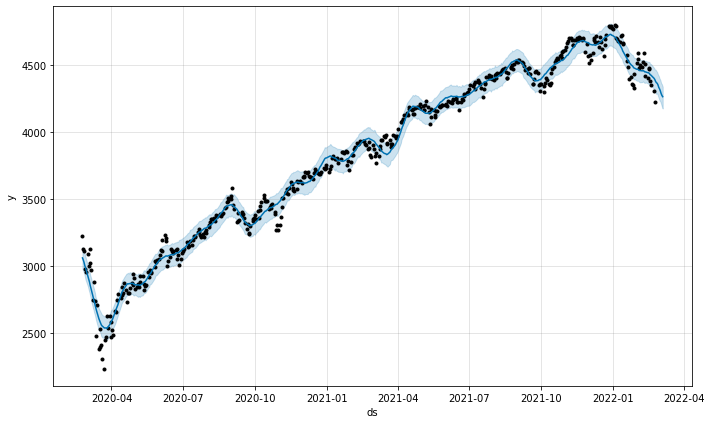

In [18]:
# plot the past and predicted SP 500 price
fig1 = sp_500_model.plot(forecast)

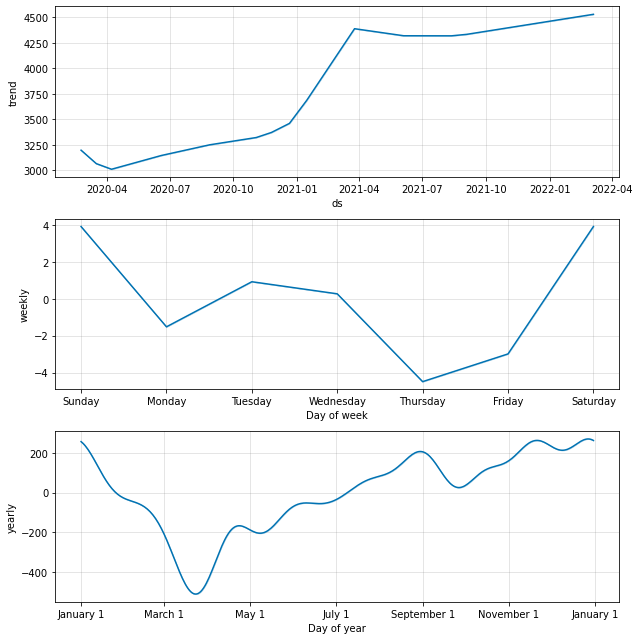

In [19]:
# plot the trend, yearly seasonality, and weekly seasonality components of our Prophet model
fig2 = sp_500_model.plot_components(forecast)

Here are some interactive plots to you can play with.

In [20]:
plot_plotly(sp_500_model, forecast)

In [21]:
plot_components_plotly(sp_500_model, forecast)

# Cross validation

![](https://drive.google.com/uc?export=view&id=1S7Ipsq0is0QJftW2dlDbnN0bHhbCOEJt)
![](https://drive.google.com/uc?export=view&id=183l1Z-YZZUX5Y59jz4R8v9J-fsbXUM6_)
![](https://drive.google.com/uc?export=view&id=1CYeJIklA6mbtZRa-bZ7NYXn8lOVWeKBt)

* `initial` - the size of the initial training period
* `period` - the spacing between cutoff dates
* `horizon` - the forecast horizon

In [27]:
# conduct cross validation
from prophet.diagnostics import cross_validation
sp_500_cv = cross_validation(sp_500_model, initial='200 days', period='20 days', horizon = '20 days')
sp_500_cv.head(10)

INFO:prophet:Making 26 forecasts with cutoffs between 2020-09-21 00:00:00 and 2022-02-03 00:00:00


  0%|          | 0/26 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-09-22,3326.627076,3254.591757,3399.460904,3315.57,2020-09-21
1,2020-09-23,3338.179536,3266.359436,3410.892099,3236.92,2020-09-21
2,2020-09-24,3325.661061,3250.543328,3397.768473,3246.59,2020-09-21
3,2020-09-25,3337.872457,3267.406596,3408.526906,3298.46,2020-09-21
4,2020-09-28,3412.575316,3342.740964,3481.940852,3351.60,2020-09-21
5,2020-09-29,3448.143986,3378.099110,3521.253099,3335.47,2020-09-21
6,2020-09-30,3485.574444,3413.889049,3561.591876,3363.00,2020-09-21
7,2020-10-01,3498.606064,3422.403342,3568.566042,3380.80,2020-09-21
8,2020-10-02,3535.453590,3463.265088,3602.702015,3348.44,2020-09-21
9,2020-10-05,3672.367282,3594.031600,3746.362951,3408.63,2020-09-21


Notice that the `'20 days'` only include 14 (trade) days in the data.

In [28]:
sp_500_cv.head(30)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-09-22,3326.627076,3254.591757,3399.460904,3315.57,2020-09-21
1,2020-09-23,3338.179536,3266.359436,3410.892099,3236.92,2020-09-21
2,2020-09-24,3325.661061,3250.543328,3397.768473,3246.59,2020-09-21
3,2020-09-25,3337.872457,3267.406596,3408.526906,3298.46,2020-09-21
4,2020-09-28,3412.575316,3342.740964,3481.940852,3351.60,2020-09-21
5,2020-09-29,3448.143986,3378.099110,3521.253099,3335.47,2020-09-21
6,2020-09-30,3485.574444,3413.889049,3561.591876,3363.00,2020-09-21
7,2020-10-01,3498.606064,3422.403342,3568.566042,3380.80,2020-09-21
8,2020-10-02,3535.453590,3463.265088,3602.702015,3348.44,2020-09-21
9,2020-10-05,3672.367282,3594.031600,3746.362951,3408.63,2020-09-21


* MSE - mean squared error
* RMSE - root mean squared error
* MAE - mean absolute error 
* MAPE - mean absolute percent error
* MDAPE - median absolute percent error
* SMAPE - symmetric mean absolute percentage error

and coverage of the yhat_lower and yhat_upper estimates

In [30]:
# compute the statistics of previous cross validation
from prophet.diagnostics import performance_metrics
sp_500_p = performance_metrics(sp_500_cv)
sp_500_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,2 days,5182.794818,71.991630,58.427945,0.014343,0.011371,0.014403,0.628571
1,3 days,7337.227157,85.657616,67.829990,0.016944,0.013319,0.017073,0.571429
2,4 days,12809.919635,113.180916,83.159340,0.021164,0.012970,0.021329,0.528571
3,5 days,20313.207293,142.524409,103.077978,0.026371,0.018676,0.026638,0.565714
4,6 days,22078.033415,148.586787,113.444805,0.028589,0.017421,0.028748,0.526316
5,7 days,33139.910744,182.043706,131.537369,0.032965,0.018454,0.033319,0.461654
6,8 days,37996.015831,194.925667,138.739236,0.034982,0.020703,0.035388,0.413445
7,9 days,29950.651123,173.062564,127.612150,0.032098,0.020703,0.032523,0.388889
8,10 days,57498.880106,239.789241,161.360496,0.040780,0.034599,0.042384,0.400000
9,11 days,106180.792021,325.853943,216.515616,0.055174,0.040443,0.057426,0.319328


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:539: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.7/dist-packages/prophet/plot.py:540: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



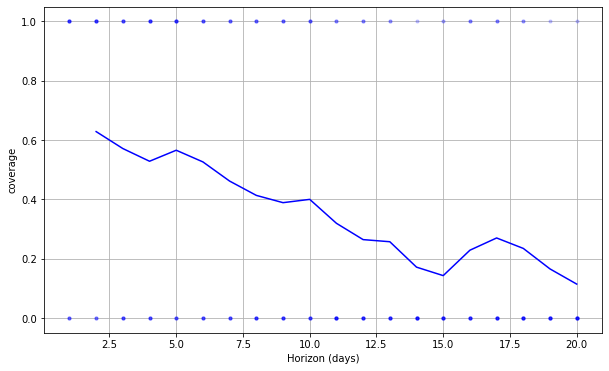

In [34]:
# plot the selected statistics of cross validation
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(sp_500_cv, metric='coverage');


# What happens in Reality?

From https://finance.yahoo.com/quote/%5EGSPC

In [45]:
future_days = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(num_future_days).head(7)
future_days['y'] = np.array([4288.70, 4384.65, 4373.94, 4306.26, 4386.54, 4363.49, 4328.87]) 
future_days

,ds,yhat,yhat_lower,yhat_upper,y
506,2022-02-24,4376.344078,4290.200861,4464.125402,4288.70
507,2022-02-25,4367.387627,4283.923469,4454.871148,4384.65
508,2022-02-26,4363.007403,4287.306993,4445.493585,4373.94
509,2022-02-27,4350.912581,4269.709752,4428.003715,4306.26
510,2022-02-28,4332.593578,4251.161977,4417.769190,4386.54
511,2022-03-01,4321.394652,4235.139698,4399.217781,4363.49
512,2022-03-02,4306.387922,4227.803019,4387.927633,4328.87


Actual price of `2022-02-24` is out of the prediction interval.

# Potential issue
1. The time indices of stock price data are not daily continuous.
2. Use wider range of SP 500? Now the starting point if the breakout of the pandemic. 